Allison Forte

January 10, 2023

DSC 550

Exercise 5.2 

In [1]:
# Import packages and data

import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import preprocessing

training_data = pd.read_csv('/Users/allison.forte/Downloads/labeledTrainData.tsv',sep = '\t')

# 1. Get the stemmed data using the same process you did in Week 3.

In [2]:
# Convert to lowercase

lower_reviews = []

for r in training_data['review']:  
    text = r.lower()
    lower_reviews.append(text)

training_data['review'] = lower_reviews


# Remove punctuation and special characters from the text

new_reviews = []

for r in training_data['review']:
    new_text = ''
    
    for character in r:
        if character.isalnum() or character == ' ':
            new_text += character
    
    new_reviews.append(new_text)
    
training_data['review'] = new_reviews


# Remove stop words

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

training_data['review'] = training_data['review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


# Apply NLTK’s PorterStemmer

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

stemmed_reviews = []

for r in training_data['review']:
    words = r.split()
    stems = [stemmer.stem(word) for word in words]
    stemmed_review = ' '.join(stems)
    stemmed_reviews.append(stemmed_review)
    
training_data['review'] = stemmed_reviews


# Check stemmed text

training_data.head(3)

,id,sentiment,review
0,5814_8,1,stuff go moment mj ive start listen music watc...
1,2381_9,1,classic war world timothi hine entertain film ...
2,7759_3,0,film start manag nichola bell give welcom inve...


# 2. Split this into a training and test set.

In [3]:
x = training_data['review']
y = training_data['sentiment']  

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

# 3. Fit and apply the tf-idf vectorization to the training set.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tf_idf = TfidfVectorizer()
train_tfidf_matrix = tf_idf.fit_transform(x_train)

# 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [5]:
test_tfidf_matrix = tf_idf.transform(x_test)

# 5. Train a logistic regression using the training data.

In [6]:
logReg = LogisticRegression()
logReg.fit(train_tfidf_matrix, y_train)
predictions = logReg.predict(test_tfidf_matrix)

# 6. Find the model accuracy on test set.

In [7]:
print(logReg.score(train_tfidf_matrix, y_train))
print(logReg.score(test_tfidf_matrix, y_test))

0.9317
0.8864


This model has a 93% accuracy based on the training data. When applied to the test data it has a 88.6% accuracy.

# 7. Create a confusion matrix for the test set predictions.

In [8]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[2195  336]
 [ 232 2237]]


# 8. Get the precision, recall, and F1-score for the test set predictions.

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2531
           1       0.87      0.91      0.89      2469

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



# 9. Create a ROC curve for the test set.

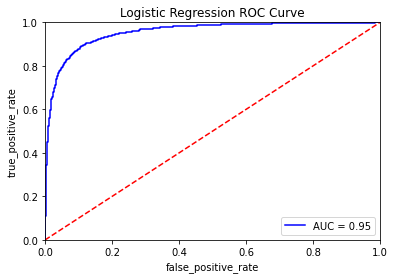

In [10]:
probabilities = logReg.predict_proba(test_tfidf_matrix)
predicts = probabilities[:,1]

false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, predicts)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt

plt.title('Logistic Regression ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = {:.2f}'.format(roc_auc))
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

# 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

Based on the training data, this model has an accuracy of 86.08%
When applied to the test data, this model has an accuracy of 78.34%

Confusion Matrix 
 [[1850  681]
 [ 402 2067]]

Precision, Recall, and F1-score 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      2531
           1       0.75      0.84      0.79      2469

    accuracy                           0.78      5000
   macro avg       0.79      0.78      0.78      5000
weighted avg       0.79      0.78      0.78      5000



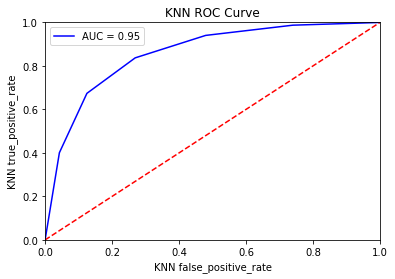

In [20]:
from sklearn.neighbors import KNeighborsClassifier


# 5. Train a KNN model using the training data.

KNN = KNeighborsClassifier()
KNN.fit(train_tfidf_matrix, y_train)
KNN_predictions = KNN.predict(test_tfidf_matrix)


# 6. Find the model accuracy on test set.

print('Based on the training data, this model has an accuracy of {:.2%}'.format(KNN.score(train_tfidf_matrix, y_train)))
print('When applied to the test data, this model has an accuracy of {:.2%}'.format(KNN.score(test_tfidf_matrix, y_test)))


# 7. Create a confusion matrix for the test set predictions.

print('\nConfusion Matrix \n', confusion_matrix(y_test, KNN_predictions))


# 8. Get the precision, recall, and F1-score for the test set predictions.

print('\nPrecision, Recall, and F1-score \n', classification_report(y_test, KNN_predictions))


# 9. Create a ROC curve for the test set.

KNN_probabilities = KNN.predict_proba(test_tfidf_matrix)
KNN_predicts = KNN_probabilities[:,1]

KNN_false_positive_rate, KNN_true_positive_rate, KNN_threshold = metrics.roc_curve(y_test, KNN_predicts)
KNN_roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.title('KNN ROC Curve')
plt.plot(KNN_false_positive_rate, KNN_true_positive_rate, 'b', label = 'AUC = {:.2f}'.format(KNN_roc_auc))
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('KNN true_positive_rate')
plt.xlabel('KNN false_positive_rate')
plt.show()